# Example 7: AH-polytopes of Zonotopes

In [1]:
import numpy as np
import pypolycontain as pp
np.random.seed(0)

In [2]:
D={}
for n in [2,3,5,7,10]:
    print("\n",n)
    X1=pp.zonotope( x=np.zeros((n,1)), G=np.random.normal(size=(n,2*n))  )
    # X2=pp.zonotope( x=np.ones((n,1))*n, G=np.random.normal(size=(n,n))  )
    # X1.color='red'
    # X2.color='purple'
    # X=pp.convex_hull(X1,X2)
    # X.color='yellow'
    X=pp.to_AH_polytope(X1)

    Y0=pp.ray_shooting_hyperplanes(X,N=n*15,tol=2)
    print(n,'\t',Y0.H.shape[0])
    B=pp.bounding_box(X)
    # pp.visualize([B,Y0,X],alpha=0.5)
    #print(pp.Hausdorff_distance(X,Y0,directed=True,k=0))
    D[n,'box']=B.D
    Y=pp.boxing_order_reduction(X1,1)
    D[n,'hyperplanes']=Y0.H.shape[0]
    try:
        Y1,D[n,'inner']=pp.inner_optimization(X,Y0,k=-1,iterations=10)
    except:
        Y1,D[n,'inner']=pp.inner_optimization(X,Y0,k=-1,method='SDP')
    Y2,D[n,'outer']=pp.outer_optimization(X,Y0)
    D[n,'ray']=pp.Hausdorff_distance(X,Y0,directed=True,k=-1)/B.D
    D[n,'opt']=pp.Hausdorff_distance(X,Y2,directed=True,k=-1)/B.D
    D[n,'order']=pp.Hausdorff_distance(X,Y,directed=True,k=-1)/B.D
    D[n,'hausinner']=pp.Hausdorff_distance(Y1,X,directed=True,k=-1)/B.D


 2
2 	 9
Using Positive Orthant
******************** 

			 Alternating Convex Program for Determinent Maximization
	 This is often faster than SDP solving. If not, use SDP
0 det= 1.0
1 det= 0.6212127404975762
converged
success
determinent= 0.6212127404975762
Using Positive Orthant
success
determinent= 1.0000140945119869

 3
3 	 25
Using Positive Orthant
******************** 

			 Alternating Convex Program for Determinent Maximization
	 This is often faster than SDP solving. If not, use SDP
0 det= 1.0
1 det= 0.2550747700813517
2 det= 0.2586155658675187
converged
success
determinent= 0.25879513215545863
Using Positive Orthant
success
determinent= 1.0000036510825714

 5
5 	 118
Using Positive Orthant
******************** 

			 Alternating Convex Program for Determinent Maximization
	 This is often faster than SDP solving. If not, use SDP
0 det= 1.0
1 det= 0.025538770097233963
2 det= 0.026585852932575427
3 det= 0.022051016959032187
4 det= 0.02749466736237516
5 det= 0.022051016959032187
6

/home/sadra/Dropbox (MIT)/pypolycontain/pypolycontain/projection.py:282: RuntimeWarning: invalid value encountered in double_scalars
  r=np.linalg.det(G_0)/det


 det= 0.0
7 det= 0.0
8 det= 0.0
9 det= 0.0
Error of convergence
Using Positive Orthant


[2021-01-20 22:57:14.690] [console] [info] SCS returns code 2, with message "SCS solved inaccurate".



success
determinent= 0.0005543392161256746
Using Positive Orthant
success
determinent= 1.1845853240250332

 10
10 	 300
Using Positive Orthant
******************** 

			 Alternating Convex Program for Determinent Maximization
	 This is often faster than SDP solving. If not, use SDP
0 det= 1.0
1 det= 2.9622052028931224e-06
2 det= 2.8259181404534783e-08
3 det= 1.3898487685099477e-12
4 det= 0.0
5 det= 0.0
6 det= 0.0
7 det= 0.0
8 det= 0.0
9 det= 0.0
Error of convergence
Using Positive Orthant


[2021-01-20 22:59:02.433] [console] [info] SCS returns code 2, with message "SCS solved inaccurate".



success
determinent= 2.482021723913747e-06
Using Positive Orthant


[2021-01-20 23:00:16.872] [console] [info] SCS returns code 2, with message "SCS solved inaccurate".



success
determinent= 1.9042742960096186


In [3]:
for n in [2,3,5,7,10]:
    print(r' %d &  %d & %0.03f & %0.03f & %0.003f & %0.03f & %0.03f  & %0.03f \\ \hline'\
         %(n, D[n,'hyperplanes'], D[n,'inner'], D[n,'hausinner'],\
           D[n,'outer'], D[n,'ray'],D[n,'opt'],D[n,'order'] ))

 2 &  9 & 0.621 & 0.101 & 1.000 & 0.105 & 0.105  & 0.254 \\ \hline
 3 &  25 & 0.259 & 0.140 & 1.000 & 0.111 & 0.111  & 0.196 \\ \hline
 5 &  118 & 0.022 & 0.188 & 0.956 & 0.197 & 0.195  & 0.322 \\ \hline
 7 &  210 & 0.001 & 0.240 & 0.844 & 0.287 & 0.310  & 0.359 \\ \hline
 10 &  300 & 0.000 & 0.275 & 0.525 & 0.448 & 0.470  & 0.362 \\ \hline


In [4]:
# Y1=pp.inner_optimization(X,Y0,k=-1)
# Y2=pp.outer_optimization(X,Y0)

projection on  0  and  1 dimensions
projection on  0  and  1 dimensions
projection on  0  and  1 dimensions
projection on  0  and  1 dimensions


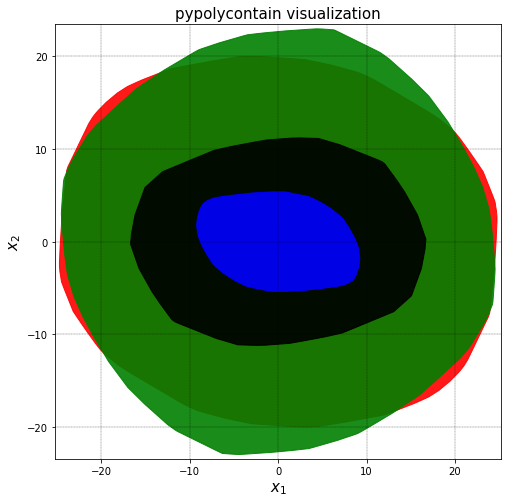

In [5]:
Y2.color,Y1.color,Y0.color='red','blue','green'
X.color,Y.color='black','yellow'
pp.visualize([Y2,Y0,X,Y1],alpha=0.9)

In [6]:
# print('Ray Shooting',pp.Hausdorff_distance(X,Y,directed=True,k=-1))
# print('Optimization',pp.Hausdorff_distance(X,Y2,directed=True,k=-1))
# print('Order Reduction',pp.Hausdorff_distance(X,Y,directed=True,k=-1))